In [20]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'BAJFINANCE.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,5.239737,5.540927,5.239737,5.412679,3.950043,21923
2002-07-02,5.523439,5.537041,5.421423,5.443769,3.972730,61044
2002-07-03,5.505950,5.545785,5.328151,5.466116,3.989040,34160
2002-07-04,5.501093,5.572018,5.417537,5.528297,4.034417,27892
2002-07-05,5.563274,5.656546,5.474860,5.590478,4.079797,58976
...,...,...,...,...,...,...
2024-06-21,7239.299805,7265.000000,7075.000000,7134.250000,7134.250000,1499818
2024-06-24,7076.000000,7106.950195,7020.549805,7081.850098,7081.850098,635654
2024-06-25,7101.000000,7140.000000,6998.000000,7074.450195,7074.450195,1560811


In [45]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(16, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(8, return_sequences=False))
model.add(Dense(4))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=8, epochs=100)

[array([1.65173306e-04, 1.68981235e-04, 1.71718330e-04, 1.79334363e-04,
       1.86950397e-04, 1.91234434e-04, 1.90163483e-04, 1.41849097e-04,
       1.37445975e-04, 1.53749168e-04, 1.55415137e-04, 1.53273177e-04,
       1.20071831e-04, 1.24474953e-04, 1.33161938e-04, 1.11384847e-04,
       1.22213908e-04, 1.22213908e-04, 9.61527799e-05, 9.88897581e-05])]
[2.2848100311718793e-05]

[array([1.65173306e-04, 1.68981235e-04, 1.71718330e-04, 1.79334363e-04,
       1.86950397e-04, 1.91234434e-04, 1.90163483e-04, 1.41849097e-04,
       1.37445975e-04, 1.53749168e-04, 1.55415137e-04, 1.53273177e-04,
       1.20071831e-04, 1.24474953e-04, 1.33161938e-04, 1.11384847e-04,
       1.22213908e-04, 1.22213908e-04, 9.61527799e-05, 9.88897581e-05]), array([1.68981235e-04, 1.71718330e-04, 1.79334363e-04, 1.86950397e-04,
       1.91234434e-04, 1.90163483e-04, 1.41849097e-04, 1.37445975e-04,
       1.53749168e-04, 1.55415137e-04, 1.53273177e-04, 1.20071831e-04,
       1.24474953e-04, 1.33161938e-04, 1.1138

In [46]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

162/162 [==============================] - 8s 12ms/step


0.9993648005312391

In [47]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

9/9 [==============================] - 0s 12ms/step


0.9173849067814668

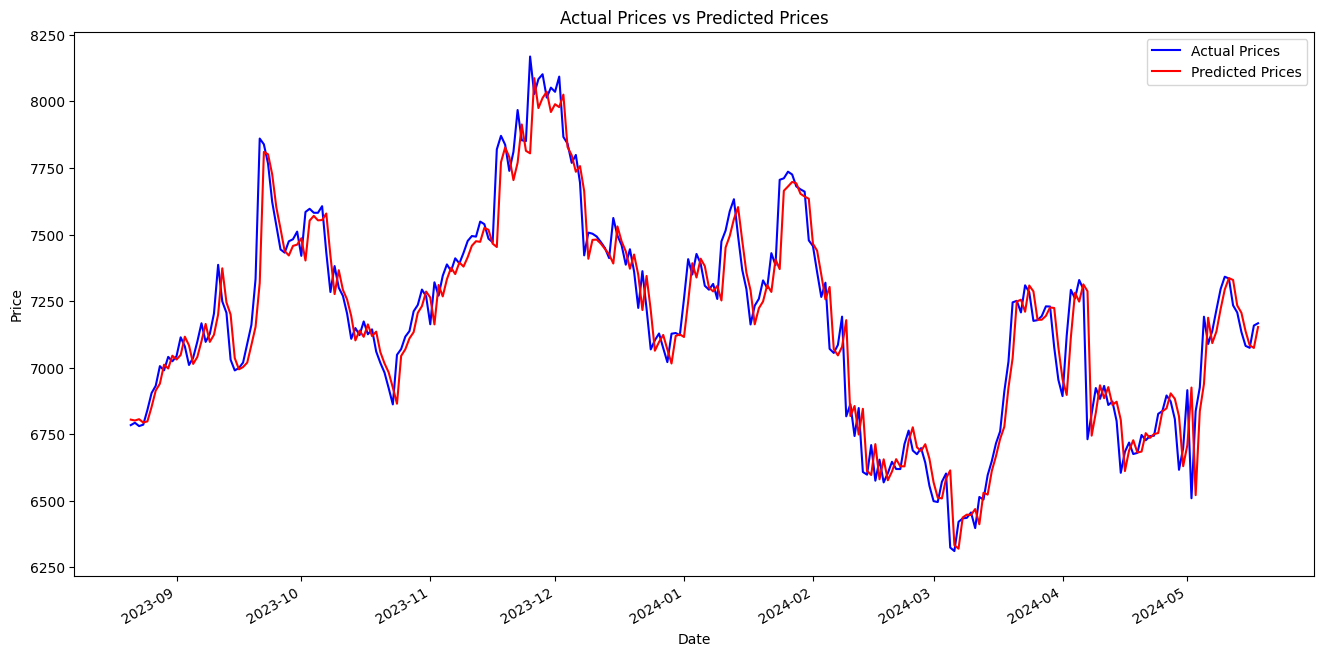

In [48]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [50]:
import joblib


model_file_path = '15.joblib'
scaler_file_path = 'scaler15.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 15.joblib
Scaler saved to scaler15.joblib
